In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
space_missing_data = pd.read_csv('spaceMissionFrom1957.csv')

In [639]:
space_mission_df = pd.DataFrame(space_missing_data)

In [640]:
space_mission_df.rename(columns={"Location of the Launch": "Location"}, inplace=True)

In [641]:
space_mission_df["Location"] = space_mission_df["Location"].str.split(",")

In [642]:
def get_last_item(lst):
    return lst[-1]

In [643]:
space_mission_df["Location"] = space_mission_df["Location"].apply(get_last_item)

In [644]:
space_mission_df["Location"] = space_mission_df["Location"][-1]

KeyError: -1

<h3>Welche Länder haben die meisten Raumfahrtmissionen durchgeführt</h3>

In [645]:
distribution_by_country = space_mission_df["Location"].value_counts()[:5]
distribution_by_country_df = pd.DataFrame(distribution_by_country)

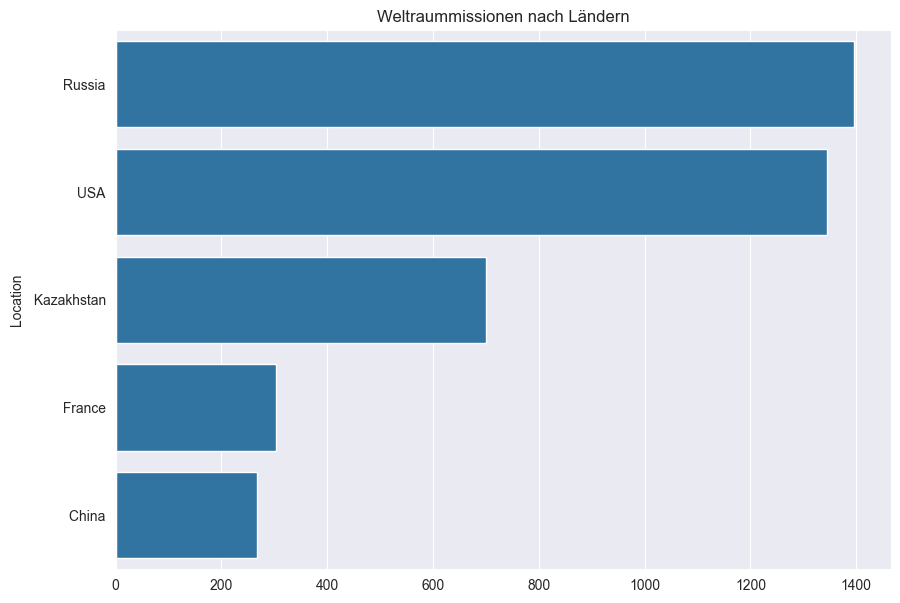

In [646]:
plt.figure(figsize=(10, 7))
sns.barplot(y="Location", x=distribution_by_country.values, data=distribution_by_country_df)
plt.title("Weltraummissionen nach Ländern")
plt.show()

In [647]:
space_mission_df

,Company Name,Location,Datum and Time of Launch,Rocket Name,Status of the rocket,Status of the mission
0,SpaceX,USA,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,China,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,USA,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,USA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success
...,...,...,...,...,...,...
4319,US Navy,USA,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,Failure
4320,AMBA,USA,"Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,Success
4321,US Navy,USA,"Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,Failure
4322,RVSN USSR,Kazakhstan,"Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,Success


<h3> Wie hat sich die Häufigkeit der Raumfahrtmissionen über die Zeit verändert? </h3>

In [772]:
space_mission_df.rename(columns={"Datum and Time of Launch": "Datum"}, inplace=True)

In [773]:
space_mission_df

,Company Name,Date,Rocket Name,Status of the rocket,Status of the mission,year
Location,,,,,,
USA,SpaceX,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,2020
China,CASC,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,2020
USA,SpaceX,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success,2020
Kazakhstan,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,2020
USA,ULA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success,2020
...,...,...,...,...,...,...
USA,US Navy,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,Failure,1958
USA,AMBA,"Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,Success,1958
USA,US Navy,"Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,Failure,1957


In [774]:
def get_year(itm):
    return itm[4]

In [775]:
space_mission_df.rename(columns={"Datum and Time of Launch": "Date"}, inplace=True)

In [776]:
space_mission_df["year"] = space_mission_df["Date"].str.split(" ")

In [779]:
def get_year(yr):
    if len(yr) >= 5:
        return yr[3]
    else:
        return None

In [780]:
space_mission_df["year"] = space_mission_df["year"].apply(get_year)

In [781]:
space_mission_df["year"] = pd.to_datetime(space_mission_df["year"])

In [782]:
space_mission_df["year"] = pd.to_datetime(space_mission_df["year"])

In [783]:
space_mission_df["year"] = space_mission_df["year"].dt.strftime("%Y")

In [784]:
number_per_year = space_mission_df["year"].value_counts()

In [785]:
number_per_year["year"].sort_values(ascending=False, inplace=True)

KeyError: 'year'

In [786]:
number_per_year.index = number_per_year.index.sort_values(ascending=True)

In [787]:
number_per_year_df =  pd.DataFrame(number_per_year)

In [788]:
number_per_year_df.columns= ["number"]

In [789]:
number_per_year_df.sample(20)

,number
year,
1961,109
2011,41
1983,64
2013,38
1998,52
1960,109
2006,46
1975,81
1981,66


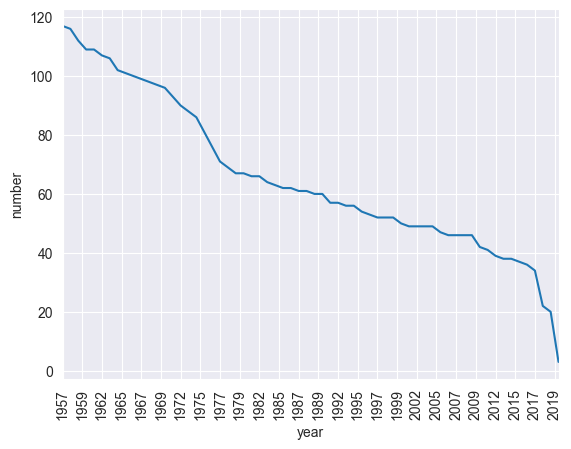

In [790]:
sns.lineplot(data=number_per_year_df, x=number_per_year_df.index, y = "number")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xlim(left=number_per_year_df.index.min(), right=number_per_year_df.index.max())
plt.show()

<h3>Wie hoch war die Anzahl der erfolgrichen Missionen in Amerika und Russland</h3>

In [795]:
space_mission_grouped_by_location

,Location,number
Status of the mission,,
Failure,Australia,3
Failure,Barents Sea,1
Failure,Brazil,2
Failure,China,19
Failure,France,13
Failure,India,8
Failure,Iran,8
Failure,Israel,2
Failure,Japan,10


In [796]:
space_mission_grouped_by_location_success = space_mission_grouped_by_location.loc["Success"]

In [797]:
sucess_russia_usa = space_mission_grouped_by_location_success.sort_values(by="number", ascending=False)[:2]

In [798]:
sucess_russia_usa

,Location,number
Status of the mission,,
Success,Russia,1303
Success,USA,1186


Text(0.5, 0, '')

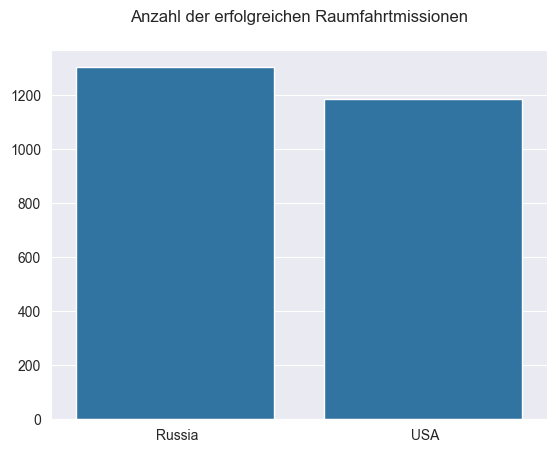

In [799]:
sns.barplot(data=sucess_russia_usa, x="Location", y="number")
plt.title("Anzahl der erfolgreichen Raumfahrtmissionen", pad=20)
plt.ylabel("")
plt.xlabel("")

<h3>Wie hoch war die Scheiterrate in Prozent von Russland und Amerika</h3>

In [800]:
space_mission_grouped_by_location_failure = space_mission_grouped_by_location.loc["Failure"]

In [801]:
number_of_missions = space_mission_df.Location.value_counts()[:2]

AttributeError: 'DataFrame' object has no attribute 'Location'

In [802]:
number_of_missions.index

Index([' Russia', ' USA'], dtype='object', name='Location')

In [803]:
number_of_missions.columns = ["number"]

In [804]:
number_of_missions_df = pd.DataFrame(number_of_missions)

In [805]:
number_of_missions.index

Index([' Russia', ' USA'], dtype='object', name='Location')

In [806]:
number_of_missions_df.loc[[" Russia", " USA"]].values

array([[1395],
       [1344]], dtype=int64)

In [807]:
space_mission_grouped_by_location_failure = space_mission_grouped_by_location_failure.sort_values(by="number", ascending=False).loc[[" USA", " Russia"]]

KeyError: "None of [Index([' USA', ' Russia'], dtype='object', name='Status of the mission')] are in the [index]"

In [808]:
space_mission_grouped_by_location_failure

,Location,number
Status of the mission,,
Failure,Australia,3
Failure,Barents Sea,1
Failure,Brazil,2
Failure,China,19
Failure,France,13
Failure,India,8
Failure,Iran,8
Failure,Israel,2
Failure,Japan,10


In [809]:
df_missions_failure = pd.merge(left= space_mission_grouped_by_location_failure, right=number_of_missions_df, on="Location")

In [810]:
df_missions_failure.columns

Index(['Location', 'number', 'count'], dtype='object')

In [811]:
df_missions_failure.columns = ["Location", "Missions Failed", "Missions Total"]


In [812]:
df_missions_failure

,Location,Missions Failed,Missions Total
0,Russia,62,1395
1,USA,127,1344


In [813]:
def find_percentage(row):
    return f"{int(row["Missions Failed"] * 100 / row["Missions Total"])}%"

In [814]:
df_missions_failure["percentage"] = df_missions_failure.apply(find_percentage, axis= 1)

In [815]:
df_missions_failure

,Location,Missions Failed,Missions Total,percentage
0,Russia,62,1395,4%
1,USA,127,1344,9%


<h3>9% der amerikanischen Raumfahrtmissionen haben nicht geklappt im vergleich zu 4% Prozent der russischen </h3>

<h3>In welchen Jahren waren die meisten Weltraummissionen</h3>

In [749]:
space_mission_df.year.value_counts()

year
2018    117
1971    116
1975    112
1976    109
1977    109
       ... 
2010     36
2012     34
1958     22
1959     20
1957      3
Name: count, Length: 64, dtype: int64

<h3> Wir sehen das die meisten Weltraummissionen in den 70. Jahren waren. Seit 2018 gab es wieder einen plötzlichen Anstieg </h3>

<h3>Welche Unternehmen sind die Ursache für den plötzlichen Anstieg</h3>

In [764]:
space_mission_df.set_index("year").loc["2018"].agg({"Company Name": "value_counts"})

,Company Name
Company Name,
CASC,37
SpaceX,21
Roscosmos,11
Arianespace,11
ULA,8
ISRO,7
VKS RF,5
MHI,4
Rocket Lab,3


<h3>Zwei der Hauptursachen sind die Unternehmen CASC und SpaceX</h3>

<h3>Welche Raketen sind noch aktiv von Russland und Amerika</h3>

In [819]:
space_mission_df.set_index("Location", inplace=True)

KeyError: "None of ['Location'] are in the columns"

In [820]:
space_mission_df_usa_russia = space_mission_df.loc[["USA", "Russia"]]

In [821]:
space_mission_df_usa_russia.groupby("Location").agg({"Status of the rocket": "value_counts"})

Status of the rocket
Location Status of the rocket                      
Russia   StatusRetired                         1359
         StatusActive                            36
USA      StatusRetired                         1136
         StatusActive                           208

<h3> Im Gegensatz zu Russland hat Amerika noch deutlich mehr weiterhin aktive Raumfahrtmissionen. 208: Amerika, 36: Russland </h3>

<h3> Welches Unternehmen hat die meisten Raumfahren durchgeführt </h3>

In [765]:
space_mission_df_usa_russia["Company Name"].value_counts()


Company Name
RVSN USSR           1198
General Dynamics     251
NASA                 203
US Air Force         161
VKS RF               157
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
Northrop              81
Lockheed              79
ILS                   40
US Navy               17
Eurockot              13
Blue Origin           12
Kosmotras             10
Roscosmos              8
MITT                   7
AMBA                   7
Khrunichev             1
Douglas                1
EER                    1
Virgin Orbit           1
Yuzhmash               1
Name: count, dtype: int64

<h3>Die meisten Raumfahren hat RVSN USSR durchgeführt</h3>